In [24]:
import pandas as pd

In [25]:
data = pd.read_pickle('data.pickle')

df = data.groupby(data['model']).sum(numeric_only=True)

df['Brier score'] = round(df['Brier score'] / 10, 3)
df['precision'] = round(df['precision'] / 10, 3)
df['recall'] = round(df['recall'] / 10, 3)
df['F1 score'] = round(df['F1'] / 10, 3)
df['profit'] = round(df['profit'] / 10, 4)
df['modified Brier score'] = round(df['modified Brier score'] / 10, 1)

df_mbs = df[['modified Brier score']].sort_values(['modified Brier score'], ascending=True)
df_mbs.to_csv('tables/mbs.csv')
df.drop(columns=['modified Brier score'])

df_profit = df.drop(columns=['Brier score','precision', 'recall', 'F1 score', 'F1'])
df_profit = df_profit.sort_values(['profit'], ascending=False)

df = df.drop(columns=['profit', 'F1'])

df_brier = df.drop(columns=['precision', 'recall', 'F1 score'])
df_brier = df_brier.sort_values(['Brier score'], ascending=True)
df_brier.to_csv('tables/brier.csv')

df_other = df.drop(columns=['Brier score'])
df_other = df_other.sort_values(['F1 score'], ascending=False)
df_other.to_csv('tables/F1.csv')


df.to_csv('tables/metrics.csv')

df_mbs

,modified Brier score
model,
Neural network,20.0
Bayesian network,24.1
Naive Bayes,25.2
k-NN,52.7


In [26]:
df_profit.to_csv('tables/profit.csv')

In [27]:
# calculating the precision and recall of trivial model

data__ = pd.read_pickle('../simulation/input_data.pickle')

percentage_of_home_wins = 0

for id, row in data__.iterrows():
    if row.result == 'home win':
        percentage_of_home_wins += 1 / len(data__)

percentage_of_home_wins

0.4583835946924047

In [28]:
data

,index,model,Brier score,precision,recall,F1,confusion_matrix,profit,modified Brier score
0,0,Naive Bayes,213.672647,0.610811,0.715190,0.658892,"[[113, 6, 39], [34, 12, 26], [38, 12, 51]]",-0.022870,30.822969
0,1,Neural network,205.593818,0.538136,0.803797,0.644670,"[[127, 18, 13], [48, 15, 9], [61, 17, 23]]",-0.000665,18.235955
0,2,k-NN,241.440000,0.540541,0.759494,0.631579,"[[120, 15, 23], [46, 8, 18], [56, 17, 28]]",0.031208,50.883994
0,3,Bayesian network,241.440000,0.540541,0.759494,0.631579,"[[120, 15, 23], [46, 8, 18], [56, 17, 28]]",0.031208,50.883994
0,4,Naive Bayes,199.269697,0.565934,0.677632,0.616766,"[[103, 11, 38], [42, 8, 26], [37, 9, 57]]",-0.140393,19.232607
0,5,Neural network,204.663858,0.598425,0.500000,0.544803,"[[76, 0, 76], [25, 0, 51], [26, 3, 74]]",-0.091541,28.684729
0,6,k-NN,220.560000,0.522727,0.756579,0.618280,"[[115, 21, 16], [51, 14, 11], [54, 19, 30]]",-0.165196,50.282553
0,7,Bayesian network,204.150574,0.496479,0.927632,0.646789,"[[141, 1, 10], [68, 0, 8], [75, 1, 27]]",-0.076979,25.007782
0,8,Naive Bayes,213.501522,0.601093,0.714286,0.652819,"[[110, 16, 28], [41, 15, 28], [32, 13, 47]]",-0.126242,28.127805
0,9,Neural network,200.647463,0.535714,0.876623,0.665025,"[[135, 10, 9], [60, 8, 16], [57, 12, 23]]",-0.217939,15.447441


In [29]:
confusion_matrixes = {
    'Naive Bayes': [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
    'Neural network': [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
    'k-NN':[[0, 0, 0], [0, 0, 0], [0, 0, 0]],
    'Bayesian network': [[0, 0, 0], [0, 0, 0], [0, 0, 0]],
}

for _, row in data.iterrows():
    matrix = confusion_matrixes[row.model]
    matrix_2 = row.confusion_matrix
    confusion_matrixes[row.model] = [[matrix[i][j] + matrix_2[i][j]  for j in range(3)] for i in range(3)]

confusion_matrixes

{'Naive Bayes': [[1054, 124, 340], [433, 113, 300], [381, 105, 458]],
 'Neural network': [[1195, 98, 225], [559, 72, 215], [533, 87, 324]],
 'k-NN': [[1053, 266, 199], [539, 139, 168], [504, 198, 242]],
 'Bayesian network': [[1359, 19, 140], [731, 11, 104], [741, 20, 183]]}

In [30]:
'AbC'.lower()

'abc'

In [31]:
import numpy as np

for key, value in confusion_matrixes.items():
    file_name = (key.lower()).replace(' ', '_')
    np.savetxt(f'tables/conf_matrix_{file_name}.csv', value, delimiter =", ", fmt ='% s')
    

In [32]:
models = []
accuracy = []

for key, value in confusion_matrixes.items():
    all_items = 0
    for i in range(3):
        for j in range(3):
            all_items += value[i][j]
    acc = value[0][0] + value[1][1] + value[2][2]
    accu = round(acc / all_items, 3)

    models.append(key)
    accuracy.append(accu)

acc_df = pd.DataFrame.from_dict({
    'model': models,
    'accuracy': accuracy
})

acc_df

,model,accuracy
0,Naive Bayes,0.491
1,Neural network,0.481
2,k-NN,0.433
3,Bayesian network,0.469


In [33]:
knn_data = pd.read_pickle('tables/kNN_analysis.pickle')

knn_data

,k,Brier score,precision,recall,F1,profit,modified Brier score
0,5.0,243.136000,0.502543,0.694067,0.582195,-0.120213,52.697455
1,6.0,234.533333,0.506489,0.703458,0.588476,-0.104134,45.374383
2,7.0,229.624490,0.511545,0.690968,0.587249,-0.083076,40.875115
3,8.0,225.003125,0.513925,0.731571,0.603020,-0.086696,37.524888
4,9.0,223.049383,0.507296,0.716605,0.593312,-0.066440,34.974867
...,...,...,...,...,...,...,...
120,125.0,203.302797,0.494614,0.900828,0.637593,-0.085780,15.985063
121,126.0,203.236042,0.494143,0.898897,0.636630,-0.072875,15.981820
122,127.0,203.199913,0.495000,0.900010,0.637727,-0.073984,15.978155
123,128.0,203.270129,0.495655,0.904792,0.639398,-0.081757,15.987255


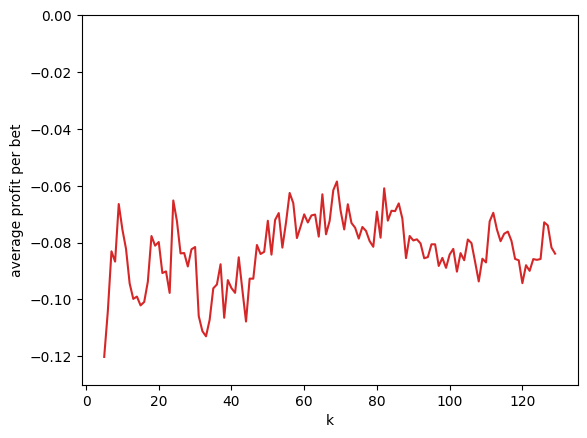

In [37]:
import matplotlib.pyplot as plt

plt.figure('kNN-profit')
plt.plot(knn_data['k'], knn_data['profit'], c='tab:red')
#plt.title('Profit in relation to k for k-nearest neighbours model')
plt.xlabel('k')
plt.ylabel('average profit per bet')
plt.ylim((-0.13, 0))
plt.savefig('plots/profit_k_knn.png')
plt.show()

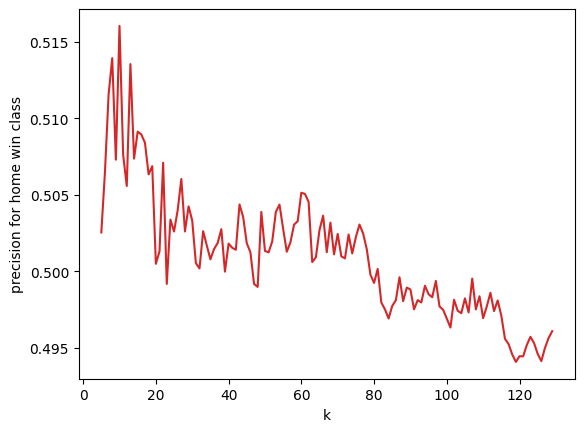

In [38]:
plt.figure('kNN-precision')
plt.plot(knn_data['k'], knn_data['precision'], c='tab:red')
#plt.title('Profit in relation to k for k-nearest neighbours model')
plt.xlabel('k')
plt.ylabel('precision for home win class')
#plt.ylim((-0.13, 0))
plt.savefig('plots/precision_k_knn.png')
plt.show()

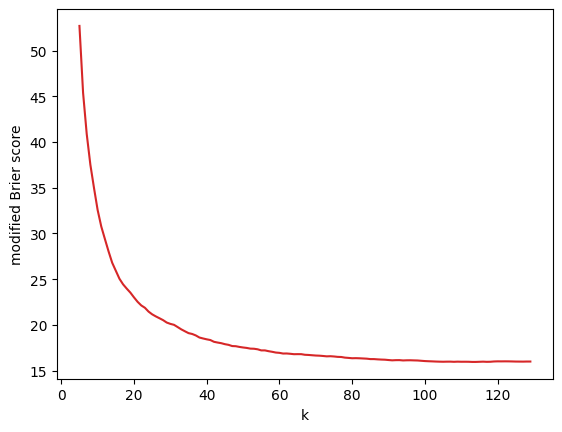

In [39]:
plt.figure('kNN-mbs')
plt.plot(knn_data['k'], knn_data['modified Brier score'], c='tab:red')
#plt.title('Profit in relation to k for k-nearest neighbours model')
plt.xlabel('k')
plt.ylabel('modified Brier score')
#plt.ylim((-0.13, 0))
plt.savefig('plots/mbs_k_knn.png')
plt.show()

In [41]:
# MLP analysis

mlp_data = pd.read_pickle('tables/MLP_analysis_sizes.pickle')

mlp_data

,k,Brier score,precision,recall,F1,profit,modified Brier score
0,1.0,204.304675,0.522472,0.858316,0.646637,-0.085696,16.303933
1,2.0,201.927014,0.523693,0.852251,0.646955,-0.082827,14.821909
2,3.0,204.943537,0.558742,0.714839,0.617478,-0.110672,16.281780
3,4.0,206.828739,0.513309,0.817087,0.627490,-0.087602,17.153391
4,5.0,211.851823,0.526548,0.755247,0.617722,-0.095387,22.827557
5,6.0,211.049758,0.531462,0.759969,0.621150,-0.075247,24.069515
6,7.0,221.812366,0.520092,0.718897,0.600550,-0.139763,32.258361
7,8.0,224.212136,0.517601,0.695753,0.590370,-0.115528,34.384430
8,9.0,222.500287,0.523975,0.702819,0.598722,-0.083261,34.535741


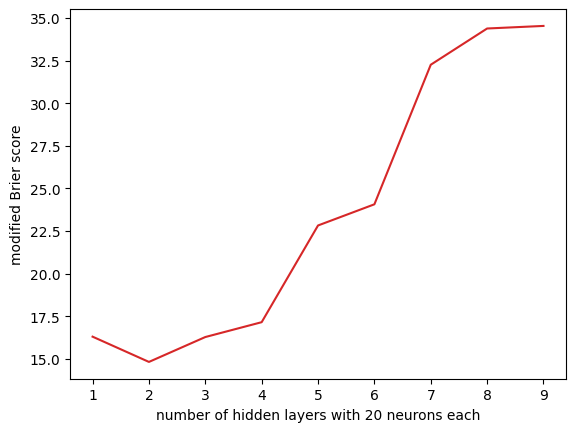

In [42]:
plt.figure('MLP-mbs')
plt.plot(mlp_data['k'], mlp_data['modified Brier score'], c='tab:red')
#plt.title('Profit in relation to k for k-nearest neighbours model')
plt.xlabel('number of hidden layers with 20 neurons each')
plt.ylabel('modified Brier score')
#plt.ylim((-0.13, 0))
plt.savefig('plots/mbs_layers_mlp.png')
plt.show()

In [45]:
data_size_analysis = pd.read_pickle('tables/data_size_analysis.pickle')

In [46]:
data_size_analysis

,data size,Brier score,precision,recall,F1,profit,modified Brier score
0,101.0,365.861999,0.529595,0.742358,0.618182,-0.05432,77.686369
1,111.0,364.494832,0.521739,0.733624,0.609800,-0.07208,74.807719
2,121.0,373.394863,0.518634,0.729258,0.606171,-0.06634,78.118018
3,131.0,367.060960,0.526154,0.746725,0.617329,-0.10324,70.809556
4,141.0,371.432250,0.531987,0.689956,0.600760,-0.11542,78.653247
...,...,...,...,...,...,...,...
265,2711.0,326.211304,0.566434,0.707424,0.629126,-0.03122,42.220704
266,2721.0,326.324144,0.570423,0.707424,0.631579,-0.03572,42.347627
267,2731.0,326.407973,0.570423,0.707424,0.631579,-0.03292,42.340576
268,2741.0,326.363666,0.566434,0.707424,0.629126,-0.02342,42.357454


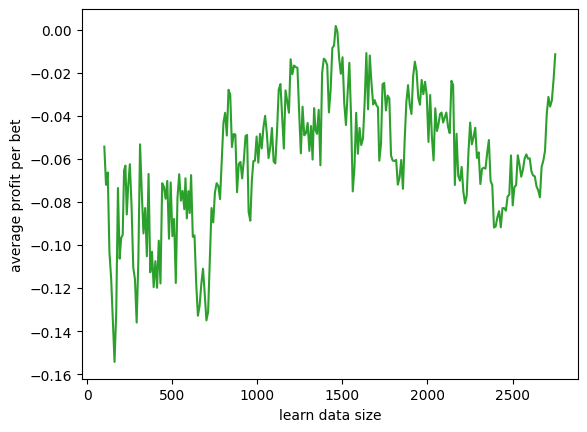

In [48]:
plt.figure('profit-data_size')
plt.plot(data_size_analysis['data size'], data_size_analysis['profit'], c='tab:green')
#plt.title('Profit in relation to k for k-nearest neighbours model')
plt.xlabel('learn data size')
plt.ylabel('average profit per bet')
#plt.ylim((-0.13, 0))
plt.savefig('plots/profit-data_size.png')
plt.show()